In [1]:
import sqlite3

import numpy as np
import pandas as pd

In [47]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin


In [3]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler


In [4]:
conn_object = sqlite3.connect("../database/cms_data.db")

In [5]:
query_string = """SELECT inp.DESYNPUF_ID, inp.CLM_FROM_DT AS CLM_FROM_DT_INP, inp.CLM_THRU_DT AS CLM_THRU_DT_INP, inp.PRVDR_NUM AS PRVDR_NUM_INP, inp.CLM_PMT_AMT AS CLM_PMT_AMT_INP, inp.NCH_PRMRY_PYR_CLM_PD_AMT AS NCH_PRMRY_PYR_CLM_PD_AMT_INP, inp.AT_PHYSN_NPI AS AT_PHYSN_NPI_INP, inp.OP_PHYSN_NPI AS OP_PHYSN_NPI_INP, inp.CLM_ADMSN_DT AS CLM_ADMSN_DT_INP, inp.CLM_PASS_THRU_PER_DIEM_AMT AS CLM_PASS_THRU_PER_DIEM_AMT_INP, inp.NCH_BENE_IP_DDCTBL_AMT AS NCH_BENE_IP_DDCTBL_AMT_INP, inp.NCH_BENE_PTA_COINSRNC_LBLTY_AM AS NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP, inp.NCH_BENE_BLOOD_DDCTBL_LBLTY_AM AS NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP, inp.CLM_UTLZTN_DAY_CNT AS CLM_UTLZTN_DAY_CNT_INP, inp.NCH_BENE_DSCHRG_DT AS NCH_BENE_DSCHRG_DT_INP, inp.CLM_DRG_CD AS CLM_DRG_CD_INP, inp.PRVDR_NUM_CAT AS PRVDR_NUM_CAT_INP, inp.Next_CLM_ADMSN_DT AS Next_CLM_ADMSN_DT_INP, 
inp.IsReadmitted AS IsReadmitted, inp.CLAIM_YEAR AS CLAIM_YEAR_INP, inp.ADMTNG_ICD9_DGNS_CD_CAT AS ADMTNG_ICD9_DGNS_CD_CAT_INP, inp.ICD9_DGNS_CD_1_CAT AS ICD9_DGNS_CD_1_CAT_INP, inp.ICD9_DGNS_CD_2_CAT AS ICD9_DGNS_CD_2_CAT_INP, inp.ICD9_DGNS_CD_3_CAT AS ICD9_DGNS_CD_3_CAT_INP, inp.ICD9_DGNS_CD_4_CAT AS ICD9_DGNS_CD_4_CAT_INP, 
inp.ICD9_DGNS_CD_5_CAT AS ICD9_DGNS_CD_5_CAT_INP, inp.ICD9_DGNS_CD_6_CAT AS ICD9_DGNS_CD_6_CAT_INP, inp.ICD9_DGNS_CD_7_CAT AS ICD9_DGNS_CD_7_CAT_INP, inp.ICD9_DGNS_CD_8_CAT AS ICD9_DGNS_CD_8_CAT_INP, inp.ICD9_DGNS_CD_9_CAT AS ICD9_DGNS_CD_9_CAT_INP, inp.ICD9_PRCDR_CD_1_CAT AS ICD9_PRCDR_CD_1_CAT_INP, 
out.CLM_FROM_DT as CLM_FROM_DT_OUT, out.CLM_THRU_DT as CLM_THRU_DT_OUT, out.PRVDR_NUM as PRVDR_NUM_OUT, out.CLM_PMT_AMT as CLM_PMT_AMT_OUT, 
out.NCH_PRMRY_PYR_CLM_PD_AMT as NCH_PRMRY_PYR_CLM_PD_AMT_OUT, out.AT_PHYSN_NPI as AT_PHYSN_NPI_OUT, out.NCH_BENE_BLOOD_DDCTBL_LBLTY_AM as NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_OUT, 
out.ICD9_DGNS_CD_1 as ICD9_DGNS_CD_1_OUT, out.ICD9_DGNS_CD_2 as ICD9_DGNS_CD_2_OUT, out.NCH_BENE_PTB_DDCTBL_AMT as NCH_BENE_PTB_DDCTBL_AMT_OUT, 
out.NCH_BENE_PTB_COINSRNC_AMT as NCH_BENE_PTB_COINSRNC_AMT_OUT, out.HCPCS_CD_1 as HCPCS_CD_1_OUT, out.HCPCS_CD_2 as HCPCS_CD_2_OUT, out.HCPCS_CD_3 as HCPCS_CD_3_OUT, out.PRVDR_NUM_CAT as PRVDR_NUM_CAT_OUT, OUT.ICD9_DGNS_CD_1_CAT AS ICD9_DGNS_CD_1_CAT_OUT,OUT.ICD9_DGNS_CD_2_CAT AS ICD9_DGNS_CD_2_CAT_OUT,OUT.HCPCS_CD_1_CAT AS HCPCS_CD_1_CAT_OUT, OUT.HCPCS_CD_2_CAT AS HCPCS_CD_2_CAT_OUT,
OUT.HCPCS_CD_3_CAT AS HCPCS_CD_3_CAT_OUT, OUT.HCPCS_CD_1_CAT_DESC AS HCPCS_CD_1_CAT_DESC_OUT, OUT.HCPCS_CD_2_CAT_DESC AS HCPCS_CD_2_CAT_DESC_OUT, OUT.HCPCS_CD_3_CAT_DESC AS HCPCS_CD_3_CAT_DESC_OUT
FROM Inpatient_claims_2 inp LEFT JOIN Outpatient_claims_2 out 
on inp.DESYNPUF_ID = out.DESYNPUF_ID 
WHERE inp.NCH_BENE_DSCHRG_DT <= out.CLM_FROM_DT AND inp.Next_CLM_ADMSN_DT >= out.CLM_FROM_DT"""


In [6]:
# claim_data = pd.read_sql_query(
#     query_string,
#     con=conn_object,
#     parse_dates=[
#         "CLM_FROM_DT",
#         "CLM_THRU_DT",
#         "CLM_ADMSN_DT",
#         "NCH_BENE_DSCHRG_DT",
#         "Next_Admission_Date",
#         "CLM_FROM_DT_OUT",
#         "CLM_THRU_DT_OUT",
#     ],
# )
claim_data = pd.read_sql_query(
    query_string,
    con=conn_object,
    parse_dates={
        "CLM_FROM_DT_INP": {"format": "%Y-%m-%d"},
        "CLM_THRU_DT_INP": {"format": "%Y-%m-%d"},
        "CLM_ADMSN_DT_INP": {"format": "%Y-%m-%d"},
        "NCH_BENE_DSCHRG_DT_INP": {"format": "%Y-%m-%d"},
        "Next_CLM_ADMSN_DT_IN": {"format": "%Y-%m-%d"},
        "CLM_FROM_DT_OUT": {"format": "%Y-%m-%d"},
        "CLM_THRU_DT_OUT": {"format": "%Y-%m-%d"},
    },
)

In [7]:
claim_data["Next_CLM_ADMSN_DT_INP"] = pd.to_datetime(
    claim_data["Next_CLM_ADMSN_DT_INP"], infer_datetime_format=True
)

In [8]:
claim_data.head()


,DESYNPUF_ID,CLM_FROM_DT_INP,CLM_THRU_DT_INP,PRVDR_NUM_INP,CLM_PMT_AMT_INP,NCH_PRMRY_PYR_CLM_PD_AMT_INP,AT_PHYSN_NPI_INP,OP_PHYSN_NPI_INP,CLM_ADMSN_DT_INP,CLM_PASS_THRU_PER_DIEM_AMT_INP,...,HCPCS_CD_3_OUT,PRVDR_NUM_CAT_OUT,ICD9_DGNS_CD_1_CAT_OUT,ICD9_DGNS_CD_2_CAT_OUT,HCPCS_CD_1_CAT_OUT,HCPCS_CD_2_CAT_OUT,HCPCS_CD_3_CAT_OUT,HCPCS_CD_1_CAT_DESC_OUT,HCPCS_CD_2_CAT_DESC_OUT,HCPCS_CD_3_CAT_DESC_OUT
0,0000525AB30E4DEF,2008-05-25,2008-06-05,3900MB,4000.0,0.0,1.511429e+09,7.340276e+09,2008-05-25,60.0,...,None,2000-2299,V01-V91,None,70010-76499,92502-92700,None,Diagnostic Radiology (Diagnostic Imaging) Proc...,Special Otorhinolaryngologic Services and Proc...,None
1,00009C897C3D8372,2008-05-14,2008-05-17,0700JR,10000.0,0.0,4.842646e+09,NaN,2008-05-14,0.0,...,None,0001-0879,240-279,None,82009-84999,None,None,Chemistry Procedures,None,None
2,0008148FCB4CB644,2009-12-11,2009-12-23,1401RR,28000.0,0.0,7.872370e+09,5.118340e+09,2009-12-11,400.0,...,Q4081,1400-1499,V01-V91,580-629,'A' Codes,90935-90999,'Q' Codes,"Transportation Services Including Ambulance, M...",Dialysis Services and Procedures,Miscellaneous Services (Temporary Codes)
3,000C5BACF2F88B1E,2009-02-18,2009-03-05,4200UH,2000.0,0.0,4.202272e+09,NaN,2009-02-18,0.0,...,None,4000-4499,710-739,390-459,70010-76499,None,None,Diagnostic Radiology (Diagnostic Imaging) Proc...,None,None
4,000C5BACF2F88B1E,2009-12-12,2009-12-12,4200UH,6000.0,0.0,4.202272e+09,NaN,2009-12-12,0.0,...,None,4000-4499,710-739,None,70010-76499,None,None,Diagnostic Radiology (Diagnostic Imaging) Proc...,None,None


In [9]:
claim_data.columns

Index(['DESYNPUF_ID', 'CLM_FROM_DT_INP', 'CLM_THRU_DT_INP', 'PRVDR_NUM_INP',
       'CLM_PMT_AMT_INP', 'NCH_PRMRY_PYR_CLM_PD_AMT_INP', 'AT_PHYSN_NPI_INP',
       'OP_PHYSN_NPI_INP', 'CLM_ADMSN_DT_INP',
       'CLM_PASS_THRU_PER_DIEM_AMT_INP', 'NCH_BENE_IP_DDCTBL_AMT_INP',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP',
       'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP', 'CLM_UTLZTN_DAY_CNT_INP',
       'NCH_BENE_DSCHRG_DT_INP', 'CLM_DRG_CD_INP', 'PRVDR_NUM_CAT_INP',
       'Next_CLM_ADMSN_DT_INP', 'IsReadmitted',
       'CLAIM_YEAR_INP', 'ADMTNG_ICD9_DGNS_CD_CAT_INP',
       'ICD9_DGNS_CD_1_CAT_INP', 'ICD9_DGNS_CD_2_CAT_INP',
       'ICD9_DGNS_CD_3_CAT_INP', 'ICD9_DGNS_CD_4_CAT_INP',
       'ICD9_DGNS_CD_5_CAT_INP', 'ICD9_DGNS_CD_6_CAT_INP',
       'ICD9_DGNS_CD_7_CAT_INP', 'ICD9_DGNS_CD_8_CAT_INP',
       'ICD9_DGNS_CD_9_CAT_INP', 'ICD9_PRCDR_CD_1_CAT_INP', 'CLM_FROM_DT_OUT',
       'CLM_THRU_DT_OUT', 'PRVDR_NUM_OUT', 'CLM_PMT_AMT_OUT',
       'NCH_PRMRY_PYR_CLM_PD_AMT_OUT', 'AT_PHYSN_NPI_OUT',

In [10]:
claim_data.dtypes

DESYNPUF_ID                                   object
CLM_FROM_DT_INP                       datetime64[ns]
CLM_THRU_DT_INP                       datetime64[ns]
PRVDR_NUM_INP                                 object
CLM_PMT_AMT_INP                              float64
NCH_PRMRY_PYR_CLM_PD_AMT_INP                 float64
AT_PHYSN_NPI_INP                             float64
OP_PHYSN_NPI_INP                             float64
CLM_ADMSN_DT_INP                      datetime64[ns]
CLM_PASS_THRU_PER_DIEM_AMT_INP               float64
NCH_BENE_IP_DDCTBL_AMT_INP                   float64
NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP           float64
NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP           float64
CLM_UTLZTN_DAY_CNT_INP                       float64
NCH_BENE_DSCHRG_DT_INP                datetime64[ns]
CLM_DRG_CD_INP                                object
PRVDR_NUM_CAT_INP                             object
Next_CLM_ADMSN_DT_INP                 datetime64[ns]
IsReadmitted                  int64
CLAIM_YEAR

In [11]:
claim_data.shape

(53191, 54)

In [12]:
beneficiary_summary_2 = pd.read_sql_query(
    "select * from Beneficiary_Data_2",
    con=conn_object,
    parse_dates=["BENE_BIRTH_DT", "BENE_DEATH_DT"],
)
beneficiary_summary_2.drop(columns=["index"], inplace=True)


In [13]:
beneficiary_summary_2.shape


(343858, 33)

In [14]:
beneficiary_summary_2.dtypes


DESYNPUF_ID                         object
BENE_BIRTH_DT               datetime64[ns]
BENE_DEATH_DT               datetime64[ns]
BENE_SEX_IDENT_CD                    int64
BENE_RACE_CD                         int64
BENE_ESRD_IND                       object
BENE_HI_CVRAGE_TOT_MONS              int64
BENE_SMI_CVRAGE_TOT_MONS             int64
BENE_HMO_CVRAGE_TOT_MONS             int64
PLAN_CVRG_MOS_NUM                    int64
SP_ALZHDMTA                          int64
SP_CHF                               int64
SP_CHRNKIDN                          int64
SP_CNCR                              int64
SP_COPD                              int64
SP_DEPRESSN                          int64
SP_DIABETES                          int64
SP_ISCHMCHT                          int64
SP_OSTEOPRS                          int64
SP_RA_OA                             int64
SP_STRKETIA                          int64
MEDREIMB_IP                        float64
BENRES_IP                          float64
PPPYMT_IP  

In [15]:
final_df = pd.merge(
    left=beneficiary_summary_2,
    right=claim_data,
    left_on=["DESYNPUF_ID", "Year"],
    right_on=["DESYNPUF_ID", "CLAIM_YEAR_INP"],
    how="inner",
)


In [16]:
final_df.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,...,HCPCS_CD_3_OUT,PRVDR_NUM_CAT_OUT,ICD9_DGNS_CD_1_CAT_OUT,ICD9_DGNS_CD_2_CAT_OUT,HCPCS_CD_1_CAT_OUT,HCPCS_CD_2_CAT_OUT,HCPCS_CD_3_CAT_OUT,HCPCS_CD_1_CAT_DESC_OUT,HCPCS_CD_2_CAT_DESC_OUT,HCPCS_CD_3_CAT_DESC_OUT
0,0000525AB30E4DEF,1920-10-01,NaT,2,1,0,12,12,0,12,...,None,2000-2299,V01-V91,None,70010-76499,92502-92700,None,Diagnostic Radiology (Diagnostic Imaging) Proc...,Special Otorhinolaryngologic Services and Proc...,None
1,00009C897C3D8372,1932-01-01,NaT,1,1,Y,12,12,12,12,...,None,0001-0879,240-279,None,82009-84999,None,None,Chemistry Procedures,None,None
2,0008148FCB4CB644,1942-06-01,NaT,1,3,Y,12,12,0,12,...,Q4081,1400-1499,V01-V91,580-629,'A' Codes,90935-90999,'Q' Codes,"Transportation Services Including Ambulance, M...",Dialysis Services and Procedures,Miscellaneous Services (Temporary Codes)
3,000C5BACF2F88B1E,1942-02-01,NaT,2,1,0,12,12,12,12,...,None,4000-4499,710-739,390-459,70010-76499,None,None,Diagnostic Radiology (Diagnostic Imaging) Proc...,None,None
4,000C5BACF2F88B1E,1942-02-01,NaT,2,1,0,12,12,12,12,...,None,4000-4499,710-739,None,70010-76499,None,None,Diagnostic Radiology (Diagnostic Imaging) Proc...,None,None


In [49]:
categorical_features = [
    "BENE_SEX_IDENT_CD",
    "BENE_RACE_CD",
    "BENE_ESRD_IND",
    "SP_ALZHDMTA",
    "SP_CHF",
    "SP_CHRNKIDN",
    "SP_CNCR",
    "SP_COPD",
    "SP_DEPRESSN",
    "SP_DIABETES",
    "SP_ISCHMCHT",
    "SP_OSTEOPRS",
    "SP_RA_OA",
    "SP_STRKETIA",
    "BENE_STATE_COUNTY_CODE",
    "PRVDR_NUM_CAT_INP",
    "ADMTNG_ICD9_DGNS_CD_CAT_INP",
    "ICD9_DGNS_CD_1_CAT_INP",
    "ICD9_DGNS_CD_2_CAT_INP",
    "ICD9_DGNS_CD_3_CAT_INP",
    "ICD9_DGNS_CD_4_CAT_INP",
    "ICD9_DGNS_CD_5_CAT_INP",
    "ICD9_DGNS_CD_6_CAT_INP",
    "ICD9_DGNS_CD_7_CAT_INP",
    "ICD9_DGNS_CD_8_CAT_INP",
    "ICD9_DGNS_CD_9_CAT_INP",
    "ICD9_PRCDR_CD_1_CAT_INP",
    "PRVDR_NUM_CAT_OUT",
    "HCPCS_CD_1_CAT_OUT",
    "HCPCS_CD_2_CAT_OUT",
    "HCPCS_CD_3_CAT_OUT",
    "ICD9_DGNS_CD_1_CAT_OUT",
    "ICD9_DGNS_CD_2_CAT_OUT",
    "IsReadmitted"
]

In [18]:
# columns to drop:
# PRVDR_NUM_INP : Category column exist PRVDR_NUM_CAT_INP
# CLM_DRG_CD_INP : Claim Diagnosis Related Group Code not relevant for Readmission detection
# PRVDR_NUM_OUT : Category column exists PRVDR_NUM_CAT_OUT
# 'ICD9_DGNS_CD_1_OUT', 'ICD9_DGNS_CD_2_OUT', 'HCPCS_CD_1_OUT', 'HCPCS_CD_2_OUT', 'HCPCS_CD_3_OUT' : Category column exists
# 'HCPCS_CD_1_CAT_DESC_OUT', 'HCPCS_CD_2_CAT_DESC_OUT', 'HCPCS_CD_3_CAT_DESC_OUT' : Description column to be used later

cols_to_drop = [
    "Year",
    "CLAIM_YEAR_INP",
    "PRVDR_NUM_INP",
    "CLM_DRG_CD_INP",
    "PRVDR_NUM_OUT",
    "ICD9_DGNS_CD_1_OUT",
    "ICD9_DGNS_CD_2_OUT",
    "HCPCS_CD_1_OUT",
    "HCPCS_CD_2_OUT",
    "HCPCS_CD_3_OUT",
    "HCPCS_CD_1_CAT_DESC_OUT",
    "HCPCS_CD_2_CAT_DESC_OUT",
    "HCPCS_CD_3_CAT_DESC_OUT",
]
date_cols = list(final_df.select_dtypes(include="datetime").columns)

In [19]:
df = final_df.copy()


In [20]:
df[categorical_features] = df[categorical_features].astype("category")


In [71]:
npi_cols = [col for col in df if "NPI" in col]
df[npi_cols] = df[npi_cols].astype("object")

In [21]:
df.drop(columns=cols_to_drop + date_cols, inplace=True, axis=1)


In [22]:
df.dtypes

DESYNPUF_ID                  object
BENE_SEX_IDENT_CD          category
BENE_RACE_CD               category
BENE_ESRD_IND              category
BENE_HI_CVRAGE_TOT_MONS       int64
                             ...   
ICD9_DGNS_CD_1_CAT_OUT     category
ICD9_DGNS_CD_2_CAT_OUT     category
HCPCS_CD_1_CAT_OUT         category
HCPCS_CD_2_CAT_OUT         category
HCPCS_CD_3_CAT_OUT         category
Length: 64, dtype: object

In [23]:
# from pandas_profiling import ProfileReport

# eda_report = ProfileReport(
#     df,
#     title="Exploratory Data Analysis",
#     minimal=True,
#     interactions={"continuous": False},
#     missing_diagrams={
#         "bar": True,
#         "matrix": True,
#         "heatmap": True,
#         "dendrogram": True,
#     },
#     correlations= {
#             "pearson": {"calculate": True},
#             "spearman": {"calculate": True},
#             "kendall": {"calculate": True},
#             "phi_k": {"calculate": True},
#             "cramers": {"calculate": True},
#         },
# )
# eda_report.to_file("output.html")

In [24]:
import scipy.stats as ss


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))



In [25]:
cramers = pd.DataFrame(
    {
        i: [cramers_v(df[i], df[j]) for j in categorical_features]
        for i in categorical_features
    }
)
cramers["column"] = [i for i in categorical_features if i not in ["memberid"]]
cramers.set_index("column", inplace=True)

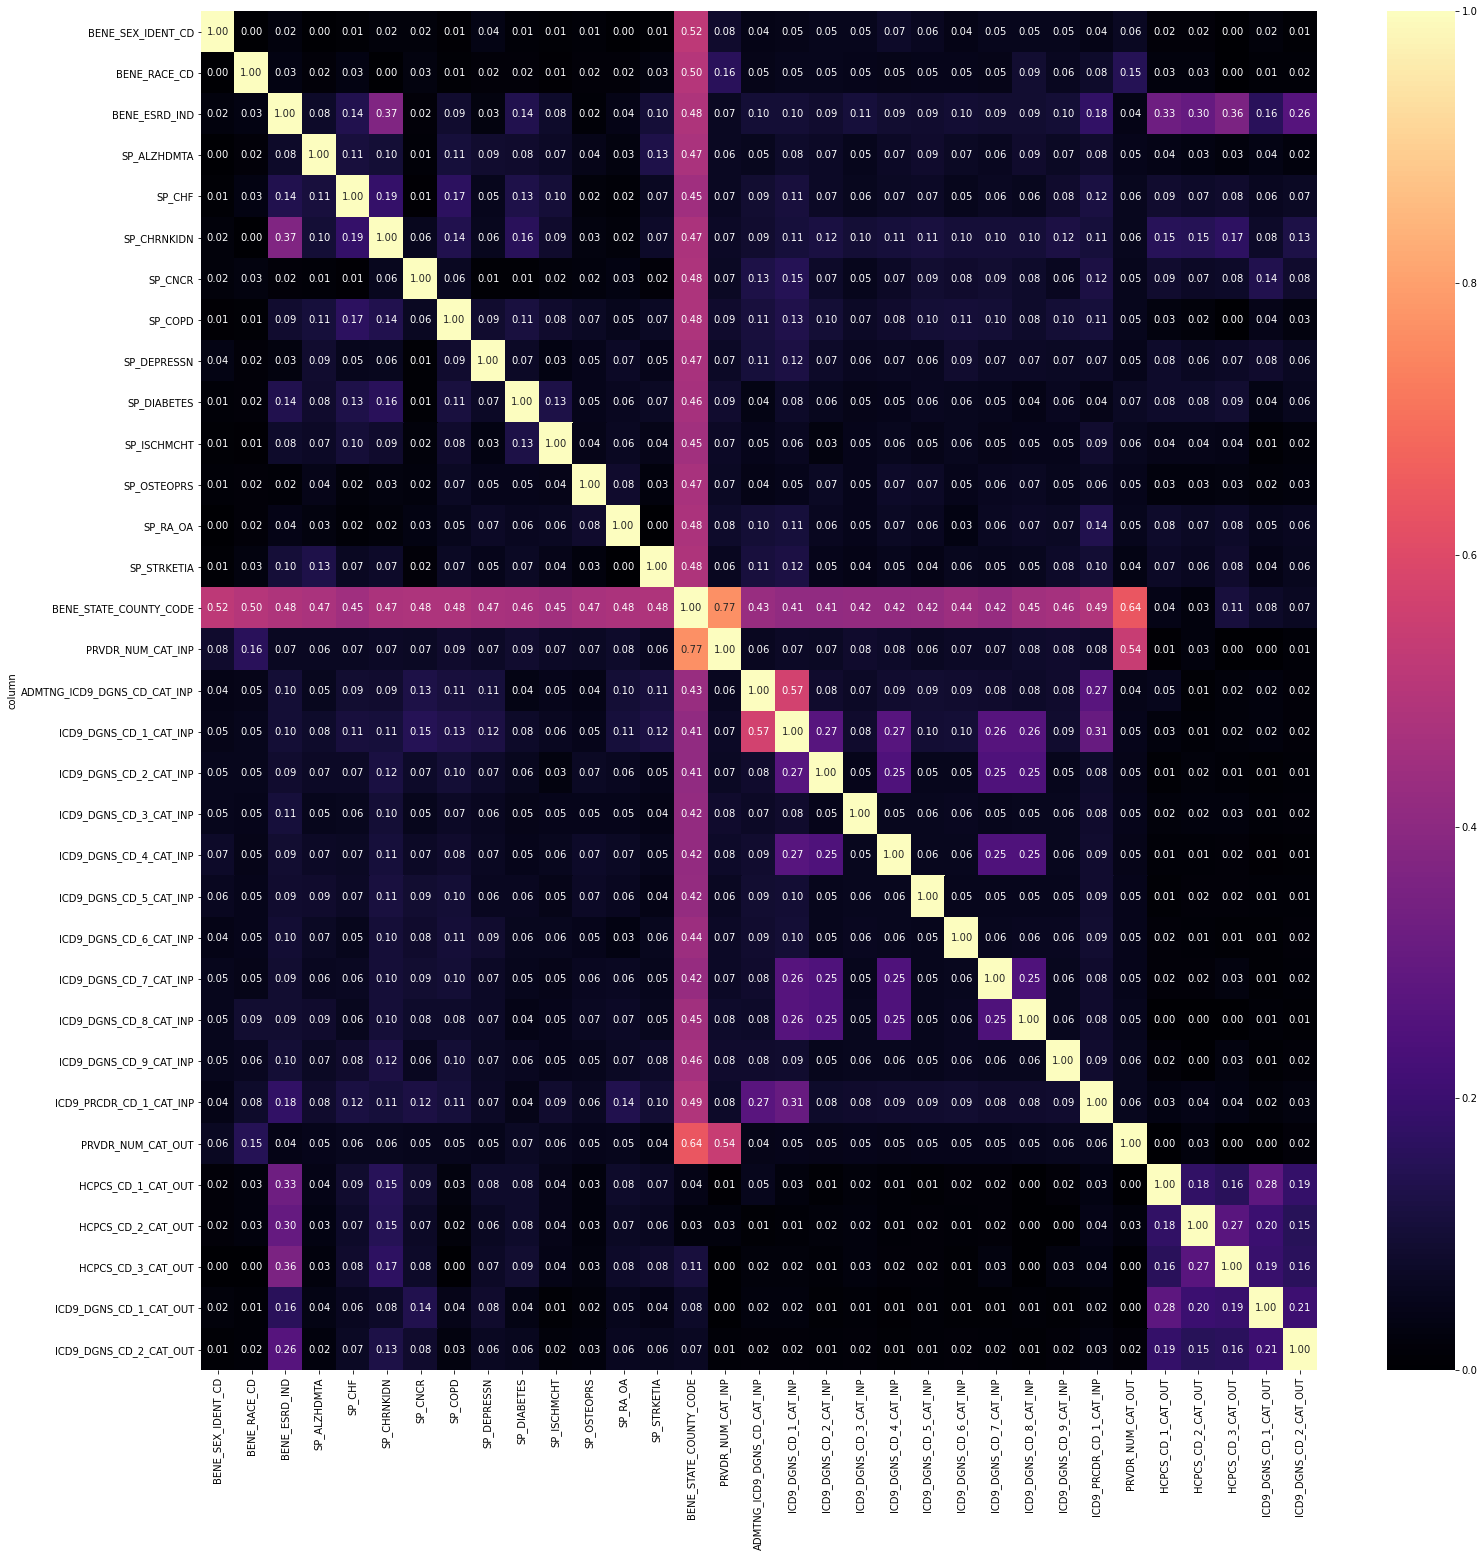

In [26]:
# categorical correlation heatmap
from matplotlib import pyplot as plt

plt.figure(figsize=(25, 25))
sns.heatmap(cramers, annot=True, fmt=".2f", cmap="magma")
plt.show()

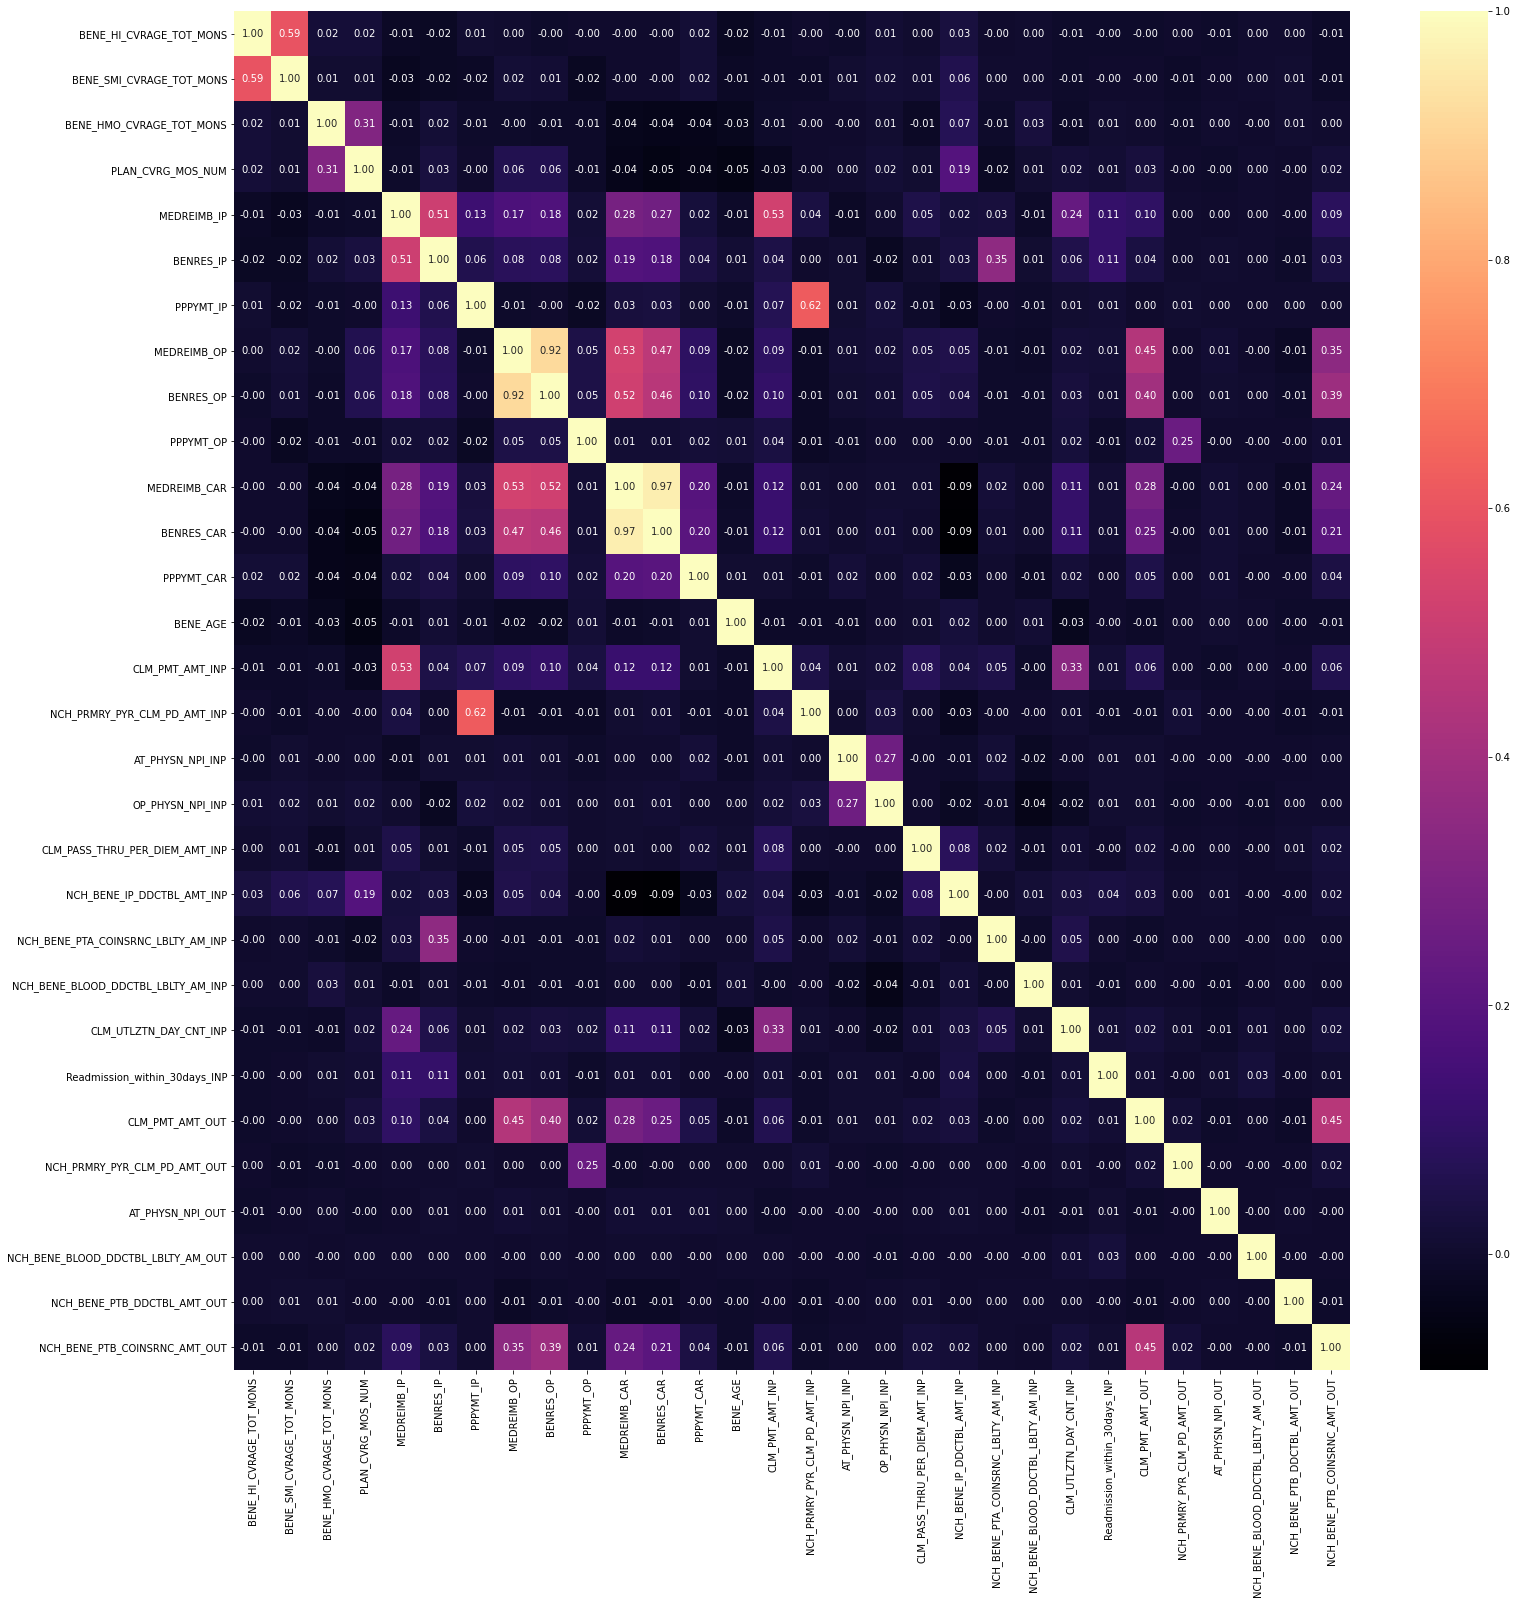

In [27]:

plt.figure(figsize=(25, 25))
sns.heatmap(
    df.select_dtypes(include="number").corr(), annot=True, fmt=".2f", cmap="magma"
)
plt.show()

In [28]:
distribution_age = pd.crosstab(
    pd.cut(df["BENE_AGE"], bins=5, labels=["25-40", "40-55", "55-70", "70-85", "85+"]),
    df["IsReadmitted"],
    normalize="index",
)

In [29]:
# Very high correlation between ('BENRES_OP', 'MEDREIMB_OP') & ('BENRES_CAR', 'MEDREIMB_CAR') hence dropping one column in the pair

df.drop(columns=["MEDREIMB_OP", "MEDREIMB_CAR"], inplace=True)



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

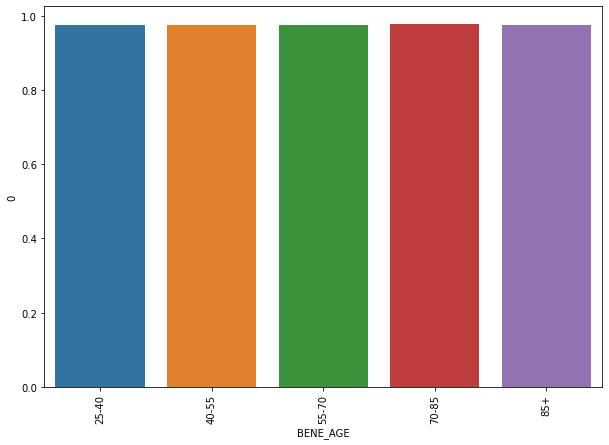

In [30]:
plt.figure(figsize=(10, 7))
sns.barplot(distribution_age.index, distribution_age[1])
sns.barplot(distribution_age.index, distribution_age[0])

plt.xticks(rotation=90)

In [31]:
class ChiSquare:
    def __init__(self, df):
        self.df = df
        self.p = None  # P-Value
        self.chi2 = None  # Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None

    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p < alpha:
            result = "{0} is IMPORTANT for Prediction".format(colX)
        else:
            result = "{0} is NOT an important predictor. (Discard {0} from model)".format(
                colX
            )

        print(result)

    def TestIndependence(self, colX, colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)

        self.dfObserved = pd.crosstab(Y, X)
        chi2, p, dof, expected = ss.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof

        self.dfExpected = pd.DataFrame(
            expected, columns=self.dfObserved.columns, index=self.dfObserved.index
        )

        self._print_chisquare_result(colX, alpha)



In [32]:
X = df.drop(["IsReadmitted"], axis=1)
ct = ChiSquare(df)
for c in X.columns:
    ct.TestIndependence(c, "IsReadmitted")


DESYNPUF_ID is IMPORTANT for Prediction
BENE_SEX_IDENT_CD is NOT an important predictor. (Discard BENE_SEX_IDENT_CD from model)
BENE_RACE_CD is NOT an important predictor. (Discard BENE_RACE_CD from model)
BENE_ESRD_IND is IMPORTANT for Prediction
BENE_HI_CVRAGE_TOT_MONS is NOT an important predictor. (Discard BENE_HI_CVRAGE_TOT_MONS from model)
BENE_SMI_CVRAGE_TOT_MONS is IMPORTANT for Prediction
BENE_HMO_CVRAGE_TOT_MONS is NOT an important predictor. (Discard BENE_HMO_CVRAGE_TOT_MONS from model)
PLAN_CVRG_MOS_NUM is NOT an important predictor. (Discard PLAN_CVRG_MOS_NUM from model)
SP_ALZHDMTA is IMPORTANT for Prediction
SP_CHF is IMPORTANT for Prediction
SP_CHRNKIDN is IMPORTANT for Prediction
SP_CNCR is IMPORTANT for Prediction
SP_COPD is IMPORTANT for Prediction
SP_DEPRESSN is IMPORTANT for Prediction
SP_DIABETES is IMPORTANT for Prediction
SP_ISCHMCHT is IMPORTANT for Prediction
SP_OSTEOPRS is NOT an important predictor. (Discard SP_OSTEOPRS from model)
SP_RA_OA is IMPORTANT for 

In [33]:
# Imputation objects
std_scalar = StandardScaler()
min_max_scalar = MinMaxScaler()
onehot_encoder = OneHotEncoder(drop="first")
median_imputer = SimpleImputer(strategy="median", missing_values=np.nan)
constant_imputer = SimpleImputer(
    strategy="constant", fill_value="Missing", missing_values=np.nan
)


In [35]:
#%%
class CardinalityReducer(BaseEstimator, TransformerMixin):
    # Class Constructor
    def __init__(self, feature_names, cutt_off=10, label="Others"):
        self.feature_names = feature_names
        self.cutt_off = cutt_off
        self.label = label

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    # Helper method to get categories which will be replaced with others
    def getInfrequentCategories(self, X, feature):
        categories_frequency = X[feature].value_counts()
        infrequent_categories = categories_frequency[
            categories_frequency <= self.cutt_off
        ].index
        return infrequent_categories

    # Method that describes what we need this transformer to do
    def transform(self, X, y=None):
        high_cardinal_columns = [
            col for col in self.feature_names if X[col].nunique() > 2
        ]
        for feature in high_cardinal_columns:
            catergories_to_remove = self.getInfrequentCategories(X, feature=feature)
            X[feature] = X[feature].cat.add_categories([self.label])
            X[feature] = X[feature].replace(catergories_to_remove, self.label)

        return X[self.feature_names]

In [36]:
#%%
numerical_transformer = Pipeline(
    steps=[("imputer_with_medium", median_imputer), ("scaler", std_scalar)],
    verbose=True,
)

#%%
categorical_transformer = Pipeline(
    steps=[
        ("imputer_with_constant", constant_imputer),
        (
            "infrequent_category_remover",
            CardinalityReducer(cutt_off=150, feature_names=categorical_features),
        ),
        ("onehot", onehot_encoder),
    ],
    verbose=True,
)

In [72]:
numerical_features = [col for col in df.select_dtypes(include="number")]
categorical_features = [col for col in df.select_dtypes(include="category")]

In [56]:
col_transformer = ColumnTransformer(
                    transformers=[
                        ('nums', numerical_transformer, numerical_features),
                        #('cats', categorical_transformer, categorical_features)
                    ],
                    remainder='drop',
                    n_jobs=-1, verbose=True
                    )

In [155]:
categorical_transformer.fit_transform(df[['BENE_SEX_IDENT_CD']])

[Pipeline]  (step 1 of 3) Processing imputer_with_constant, total=   0.0s


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [58]:
X_numerical_transformed = col_transformer.fit_transform(df)

In [74]:
df[numerical_features].isna().sum()

BENE_HI_CVRAGE_TOT_MONS                 0
BENE_SMI_CVRAGE_TOT_MONS                0
BENE_HMO_CVRAGE_TOT_MONS                0
PLAN_CVRG_MOS_NUM                       0
MEDREIMB_IP                             0
BENRES_IP                               0
PPPYMT_IP                               0
BENRES_OP                               0
PPPYMT_OP                               0
BENRES_CAR                              0
PPPYMT_CAR                              0
BENE_AGE                                0
CLM_PMT_AMT_INP                         0
NCH_PRMRY_PYR_CLM_PD_AMT_INP            0
CLM_PASS_THRU_PER_DIEM_AMT_INP          0
NCH_BENE_IP_DDCTBL_AMT_INP            865
NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP      0
NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP      0
CLM_UTLZTN_DAY_CNT_INP                  0
CLM_PMT_AMT_OUT                         0
NCH_PRMRY_PYR_CLM_PD_AMT_OUT            0
NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_OUT      0
NCH_BENE_PTB_DDCTBL_AMT_OUT             0
NCH_BENE_PTB_COINSRNC_AMT_OUT     

In [75]:
for cols in numerical_features:
    df[cols] = numerical_transformer.fit_transform(df[[cols]])

[Pipeline]  (step 1 of 2) Processing imputer_with_medium, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s
[Pipeline]  (step 1 of 2) Processing imputer_with_medium, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s
[Pipeline]  (step 1 of 2) Processing imputer_with_medium, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s
[Pipeline]  (step 1 of 2) Processing imputer_with_medium, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s
[Pipeline]  (step 1 of 2) Processing imputer_with_medium, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s
[Pipeline]  (step 1 of 2) Processing imputer_with_medium, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s
[Pipeline]  (step 1 of 2) Processing imputer_with_medium, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s

In [77]:
categorical_features

['BENE_SEX_IDENT_CD',
 'BENE_RACE_CD',
 'BENE_ESRD_IND',
 'SP_ALZHDMTA',
 'SP_CHF',
 'SP_CHRNKIDN',
 'SP_CNCR',
 'SP_COPD',
 'SP_DEPRESSN',
 'SP_DIABETES',
 'SP_ISCHMCHT',
 'SP_OSTEOPRS',
 'SP_RA_OA',
 'SP_STRKETIA',
 'BENE_STATE_COUNTY_CODE',
 'PRVDR_NUM_CAT_INP',
 'IsReadmitted',
 'ADMTNG_ICD9_DGNS_CD_CAT_INP',
 'ICD9_DGNS_CD_1_CAT_INP',
 'ICD9_DGNS_CD_2_CAT_INP',
 'ICD9_DGNS_CD_3_CAT_INP',
 'ICD9_DGNS_CD_4_CAT_INP',
 'ICD9_DGNS_CD_5_CAT_INP',
 'ICD9_DGNS_CD_6_CAT_INP',
 'ICD9_DGNS_CD_7_CAT_INP',
 'ICD9_DGNS_CD_8_CAT_INP',
 'ICD9_DGNS_CD_9_CAT_INP',
 'ICD9_PRCDR_CD_1_CAT_INP',
 'PRVDR_NUM_CAT_OUT',
 'ICD9_DGNS_CD_1_CAT_OUT',
 'ICD9_DGNS_CD_2_CAT_OUT',
 'HCPCS_CD_1_CAT_OUT',
 'HCPCS_CD_2_CAT_OUT',
 'HCPCS_CD_3_CAT_OUT']

In [100]:
map_bene_sex_ident = {1 : 'Male', 2: "Female"}
map_bene_race = {1 : 'White', 2 : 'Black', 3 : 'Others', 4 : 'Hispanic'}
map_comorbidities = {1 : "Yes", 2 : 'No'}
map_target = {1 : "Readmitted", 0: "Not Readmitted"}

In [101]:
df['BENE_SEX_IDENT_CD'] = df['BENE_SEX_IDENT_CD'].map(map_bene_sex_ident)
df['BENE_RACE_CD'] = df['BENE_RACE_CD'].map(map_bene_race)
df['IsReadmitted'] = df['IsReadmitted'].map(map_target)

In [92]:
for col in [col for col in df if "SP" in col]:
    df[col] = df[col].map(map_comorbidities)

In [102]:
df[categorical_features].isna().sum()

BENE_SEX_IDENT_CD                52910
BENE_RACE_CD                     52910
BENE_ESRD_IND                        0
SP_ALZHDMTA                          0
SP_CHF                               0
SP_CHRNKIDN                          0
SP_CNCR                              0
SP_COPD                              0
SP_DEPRESSN                          0
SP_DIABETES                          0
SP_ISCHMCHT                          0
SP_OSTEOPRS                          0
SP_RA_OA                             0
SP_STRKETIA                          0
BENE_STATE_COUNTY_CODE               0
PRVDR_NUM_CAT_INP                    0
IsReadmitted        0
ADMTNG_ICD9_DGNS_CD_CAT_INP        465
ICD9_DGNS_CD_1_CAT_INP              24
ICD9_DGNS_CD_2_CAT_INP              49
ICD9_DGNS_CD_3_CAT_INP             294
ICD9_DGNS_CD_4_CAT_INP             805
ICD9_DGNS_CD_5_CAT_INP            2165
ICD9_DGNS_CD_6_CAT_INP            4192
ICD9_DGNS_CD_7_CAT_INP            7050
ICD9_DGNS_CD_8_CAT_INP           10519
ICD

In [103]:
for col in categorical_features:
    df[col] = constant_imputer.fit_transform(df[[col]])

In [105]:
df.isna().sum()[df.isna().sum() > 0]

AT_PHYSN_NPI_INP      815
OP_PHYSN_NPI_INP    21564
AT_PHYSN_NPI_OUT      563
dtype: int64

In [107]:
import statsmodels.api as sm

In [115]:
s = ""
for col in numerical_features:
    print(f'{col}', end=" + ")

BENE_HI_CVRAGE_TOT_MONS + BENE_SMI_CVRAGE_TOT_MONS + BENE_HMO_CVRAGE_TOT_MONS + PLAN_CVRG_MOS_NUM + MEDREIMB_IP + BENRES_IP + PPPYMT_IP + BENRES_OP + PPPYMT_OP + BENRES_CAR + PPPYMT_CAR + BENE_AGE + CLM_PMT_AMT_INP + NCH_PRMRY_PYR_CLM_PD_AMT_INP + CLM_PASS_THRU_PER_DIEM_AMT_INP + NCH_BENE_IP_DDCTBL_AMT_INP + NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP + NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP + CLM_UTLZTN_DAY_CNT_INP + CLM_PMT_AMT_OUT + NCH_PRMRY_PYR_CLM_PD_AMT_OUT + NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_OUT + NCH_BENE_PTB_DDCTBL_AMT_OUT + NCH_BENE_PTB_COINSRNC_AMT_OUT + 

In [118]:
for col in categorical_features:
    print(f'C({col})', end=" + ")

C(BENE_SEX_IDENT_CD) + C(BENE_RACE_CD) + C(BENE_ESRD_IND) + C(SP_ALZHDMTA) + C(SP_CHF) + C(SP_CHRNKIDN) + C(SP_CNCR) + C(SP_COPD) + C(SP_DEPRESSN) + C(SP_DIABETES) + C(SP_ISCHMCHT) + C(SP_OSTEOPRS) + C(SP_RA_OA) + C(SP_STRKETIA) + C(BENE_STATE_COUNTY_CODE) + C(PRVDR_NUM_CAT_INP) + C(IsReadmitted) + C(ADMTNG_ICD9_DGNS_CD_CAT_INP) + C(ICD9_DGNS_CD_1_CAT_INP) + C(ICD9_DGNS_CD_2_CAT_INP) + C(ICD9_DGNS_CD_3_CAT_INP) + C(ICD9_DGNS_CD_4_CAT_INP) + C(ICD9_DGNS_CD_5_CAT_INP) + C(ICD9_DGNS_CD_6_CAT_INP) + C(ICD9_DGNS_CD_7_CAT_INP) + C(ICD9_DGNS_CD_8_CAT_INP) + C(ICD9_DGNS_CD_9_CAT_INP) + C(ICD9_PRCDR_CD_1_CAT_INP) + C(PRVDR_NUM_CAT_OUT) + C(ICD9_DGNS_CD_1_CAT_OUT) + C(ICD9_DGNS_CD_2_CAT_OUT) + C(HCPCS_CD_1_CAT_OUT) + C(HCPCS_CD_2_CAT_OUT) + C(HCPCS_CD_3_CAT_OUT) + 

In [147]:
formula = """IsReadmitted ~ BENE_HI_CVRAGE_TOT_MONS + BENE_SMI_CVRAGE_TOT_MONS + BENE_HMO_CVRAGE_TOT_MONS + PLAN_CVRG_MOS_NUM + MEDREIMB_IP + BENRES_IP + PPPYMT_IP + BENRES_OP + PPPYMT_OP + BENRES_CAR + PPPYMT_CAR + BENE_AGE + CLM_PMT_AMT_INP + NCH_PRMRY_PYR_CLM_PD_AMT_INP + CLM_PASS_THRU_PER_DIEM_AMT_INP + NCH_BENE_IP_DDCTBL_AMT_INP + NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP + NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP + CLM_UTLZTN_DAY_CNT_INP + CLM_PMT_AMT_OUT + NCH_PRMRY_PYR_CLM_PD_AMT_OUT + NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_OUT + NCH_BENE_PTB_DDCTBL_AMT_OUT + NCH_BENE_PTB_COINSRNC_AMT_OUT + C(BENE_SEX_IDENT_CD) + C(BENE_RACE_CD) + C(BENE_ESRD_IND) + C(SP_ALZHDMTA) + C(SP_CHF) + C(SP_CHRNKIDN) + C(SP_CNCR) + C(SP_COPD) + C(SP_DEPRESSN) + C(SP_DIABETES) + C(SP_ISCHMCHT) + C(SP_OSTEOPRS) + C(SP_RA_OA) + C(SP_STRKETIA) + C(ICD9_DGNS_CD_1_CAT_INP)"""

In [148]:
model = sm.GLM.from_formula(formula, family=sm.families.Binomial(), data=df)

In [149]:
result = model.fit()

In [ ]:
+ C(BENE_SEX_IDENT_CD) + C(BENE_RACE_CD) + C(BENE_ESRD_IND) + C(SP_ALZHDMTA) + C(SP_CHF) + C(SP_CHRNKIDN) + C(SP_CNCR) + C(SP_COPD) + C(SP_DEPRESSN) + C(SP_DIABETES) + C(SP_ISCHMCHT) + C(SP_OSTEOPRS) + C(SP_RA_OA) + C(SP_STRKETIA) + C(PRVDR_NUM_CAT_INP) + C(ADMTNG_ICD9_DGNS_CD_CAT_INP) + C(ICD9_DGNS_CD_1_CAT_INP) + C(ICD9_DGNS_CD_2_CAT_INP) + C(ICD9_DGNS_CD_3_CAT_INP) + C(ICD9_DGNS_CD_4_CAT_INP) + C(ICD9_DGNS_CD_5_CAT_INP) + C(ICD9_DGNS_CD_6_CAT_INP) + C(ICD9_DGNS_CD_7_CAT_INP) + C(ICD9_DGNS_CD_8_CAT_INP) + C(ICD9_DGNS_CD_9_CAT_INP) + C(ICD9_PRCDR_CD_1_CAT_INP) + C(PRVDR_NUM_CAT_OUT) + C(ICD9_DGNS_CD_1_CAT_OUT) + C(ICD9_DGNS_CD_2_CAT_OUT) + C(HCPCS_CD_1_CAT_OUT) + C(HCPCS_CD_2_CAT_OUT) + C(HCPCS_CD_3_CAT_OUT)

In [150]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                       Generalized Linear Model Regression Results                                                        
==========================================================================================================================================================
Dep. Variable:     ['IsReadmitted[Not Readmitted]', 'IsReadmitted[Readmitted]']   No. Observations:                52910
Model:                                                                                                        GLM   Df Residuals:                    52856
Model Family:                                                                                            Binomial   Df Model:                           53
Link Function:                                                                                              logit   Scale:                          1.0000
Method:                                                                                                      IRLS   Log-Likelihood:                -5395.8
Date:                                                                                            Mon, 12 Oct 2020   Deviance:                       10792.
Time:                                                                                                    00:00:55   Pearson chi2:                 4.63e+04
No. Iterations:                                                                                                22                                         
Covariance Type:                                                                                        nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                5.3531      0.278     19.223      0.000       4.807       5.899
C(BENE_ESRD_IND)[T.Y]                   -0.0279      0.069     -0.404      0.686      -0.163       0.108
C(SP_ALZHDMTA)[T.Yes]                   -0.0670      0.064     -1.044      0.296      -0.193       0.059
C(SP_CHF)[T.Yes]                        -0.2316      0.114     -2.036      0.042      -0.455      -0.009
C(SP_CHRNKIDN)[T.Yes]                   -0.2309      0.088     -2.621      0.009      -0.403      -0.058
C(SP_CNCR)[T.Yes]                       -0.1333      0.068     -1.956      0.050      -0.267       0.000
C(SP_COPD)[T.Yes]                       -0.0517      0.067     -0.771      0.441      -0.183       0.080
C(SP_DEPRESSN)[T.Yes]                   -0.0543      0.064     -0.846      0.398      -0.180       0.072
C(SP_DIABETES)[T.Yes]                   -0.3274      0.134     -2.435      0.015      -0.591      -0.064
C(SP_ISCHMCHT)[T.Yes]                   -0.3666      0.181     -2.021      0.043      -0.722      -0.011
C(SP_OSTEOPRS)[T.Yes]                    0.1170      0.061      1.909      0.056      -0.003       0.237
C(SP_RA_OA)[T.Yes]                      -0.1405      0.061     -2.306      0.021      -0.260      -0.021
C(SP_STRKETIA)[T.Yes]                   -0.1472      0.067     -2.188      0.029      -0.279      -0.015
C(ICD9_DGNS_CD_1_CAT_INP)[T.140-239]    -0.3008      0.214     -1.407      0.159      -0.720       0.118
C(ICD9_DGNS_CD_1_CAT_INP)[T.240-279]     0.2260      0.221      1.021      0.307      -0.208       0.660
C(ICD9_DGNS_CD_1_CAT_INP)[T.280-289]    -0.0532      0.284     -0.187      0.851      -0.610       0.504
C(ICD9_DGNS_CD_1_CAT_INP)[T.290-319]    -0.5055      0.213     -2.376      0.018      -0.923      -0.088
C(ICD9_DGNS_CD_1_CAT_INP)[T.320-389]    -0.1832      0.257     -0.712      0.476      -0.687       0.321
C(ICD9_DGNS_CD_1_CAT_INP)[T.390-459]    -0.2172      0.160     -1.356      0

In [152]:
result.pvalues[result.pvalues < 0.05].index

Index(['Intercept', 'C(SP_CHF)[T.Yes]', 'C(SP_CHRNKIDN)[T.Yes]',
       'C(SP_DIABETES)[T.Yes]', 'C(SP_ISCHMCHT)[T.Yes]', 'C(SP_RA_OA)[T.Yes]',
       'C(SP_STRKETIA)[T.Yes]', 'C(ICD9_DGNS_CD_1_CAT_INP)[T.290-319]',
       'C(ICD9_DGNS_CD_1_CAT_INP)[T.V01-V91]', 'MEDREIMB_IP', 'BENRES_IP',
       'BENRES_CAR', 'CLM_PMT_AMT_INP', 'NCH_BENE_IP_DDCTBL_AMT_INP',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP'],
      dtype='object')

In [153]:
X = df.drop(["IsReadmitted"], axis=1)
ct = ChiSquare(df)
for c in X.columns:
    ct.TestIndependence(c, "IsReadmitted")

DESYNPUF_ID is IMPORTANT for Prediction
BENE_SEX_IDENT_CD is NOT an important predictor. (Discard BENE_SEX_IDENT_CD from model)
BENE_RACE_CD is NOT an important predictor. (Discard BENE_RACE_CD from model)
BENE_ESRD_IND is IMPORTANT for Prediction
BENE_HI_CVRAGE_TOT_MONS is NOT an important predictor. (Discard BENE_HI_CVRAGE_TOT_MONS from model)
BENE_SMI_CVRAGE_TOT_MONS is IMPORTANT for Prediction
BENE_HMO_CVRAGE_TOT_MONS is NOT an important predictor. (Discard BENE_HMO_CVRAGE_TOT_MONS from model)
PLAN_CVRG_MOS_NUM is NOT an important predictor. (Discard PLAN_CVRG_MOS_NUM from model)
SP_ALZHDMTA is IMPORTANT for Prediction
SP_CHF is IMPORTANT for Prediction
SP_CHRNKIDN is IMPORTANT for Prediction
SP_CNCR is IMPORTANT for Prediction
SP_COPD is IMPORTANT for Prediction
SP_DEPRESSN is IMPORTANT for Prediction
SP_DIABETES is IMPORTANT for Prediction
SP_ISCHMCHT is IMPORTANT for Prediction
SP_OSTEOPRS is NOT an important predictor. (Discard SP_OSTEOPRS from model)
SP_RA_OA is IMPORTANT for 